In [1]:
# Don't Run this Cell. This is for parallel programming on my computer
import ipyparallel as ipp
import time

c=ipp.Client()

dview=c[:]

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

df2=pd.read_csv("Data Set - industrial_safety_and_health_database_with_accidents_description.csv")

df2.head()
df2.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df2.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [4]:
from nltk.tokenize import word_tokenize


In [5]:
df=df2[["Accident Level","Description"]]

In [6]:
df.columns=["Target","Text"]

In [7]:
df["Target"]=df["Target"].astype("category")

In [8]:
df

,Target,Text
0,I,While removing the drill rod of the Jumbo 08 f...
1,I,During the activation of a sodium sulphide pum...
2,I,In the sub-station MILPO located at level +170...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...
4,IV,Approximately at 11:45 a.m. in circumstances t...
...,...,...
420,I,"Being approximately 5:00 a.m. approximately, w..."
421,I,The collaborator moved from the infrastructure...
422,I,During the environmental monitoring activity i...
423,I,The Employee performed the activity of strippi...


In [9]:
from dateutil.parser import parse

#########################################################
# Eliminating date and time entry strings
#########################################################
def is_date(string, fuzzy=False):
    try: 
        parse(string, fuzzy=fuzzy)
        return True
    except ValueError:
        return False
#########################################################
# Function giving us cleaned word tokens
#########################################################

In [10]:
import nltk
nltk.download("stopwords")

#########################################################
# Function giving us cleaned word tokens
#########################################################
def word_processing(text_input):
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    stopwords=stopwords.words('english')
    import string
    from dateutil.parser import parse
    from string import punctuation as punct
    ###################################################
    # We can use this for further analysis if wanted.
    def is_date(string, fuzzy=False):
        try: 
            parse(string, fuzzy=fuzzy)
            return True
        except ValueError:
            return False
    ##################################################
    from nltk.corpus import words as eng_words
    text=word_tokenize(text_input)
    text=[word.lower() for word in text if word not in stopwords]
    text=[word for word in text if word not in punct]
    text=[word for word in text if not is_date(word)]
    text=[word for word in text if word in eng_words.words()]
    return text
######################################################
# End of Function
######################################################

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sheshank_Joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#df["tokens"]=dview.map_sync(word_processing,df["Text"])

df["tokens"]=df["Text"].apply(word_processing)

In [12]:
df["count"]=df["tokens"].apply(len)

In [13]:
from nltk.tokenize import word_tokenize
df["count2"]=df["Text"].apply(word_tokenize).apply(len)

In [14]:
df["diff"]=df["count2"]-df["count"]

In [15]:
df.head()

,Target,Text,tokens,count,count2,diff
0,I,While removing the drill rod of the Jumbo 08 f...,"[while, removing, drill, rod, jumbo, maintenan...",33,84,51
1,I,During the activation of a sodium sulphide pum...,"[during, activation, sodium, sulphide, pump, p...",26,59,33
2,I,In the sub-station MILPO located at level +170...,"[in, level, collaborator, excavation, work, pi...",23,62,39
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,"[being, approximately, personnel, task, unlock...",36,110,74
4,IV,Approximately at 11:45 a.m. in circumstances t...,"[approximately, mechanics, group, leader, eric...",27,100,73


In [16]:
df["diff"].describe()

count    425.000000
mean      44.929412
std       23.973348
min        9.000000
25%       26.000000
50%       41.000000
75%       56.000000
max      137.000000
Name: diff, dtype: float64

**Observation to Note**

Note the differences in the number of genuine words and the words that are before the elimination. The difference is a key indicator of sequence structure and references to sequence of events (implied by the usage of stop words or obvious words)

In [17]:
from nltk.corpus import stopwords
for each in stopwords.words("english"):
    #print(each)
    pass

In [18]:
df

,Target,Text,tokens,count,count2,diff
0,I,While removing the drill rod of the Jumbo 08 f...,"[while, removing, drill, rod, jumbo, maintenan...",33,84,51
1,I,During the activation of a sodium sulphide pum...,"[during, activation, sodium, sulphide, pump, p...",26,59,33
2,I,In the sub-station MILPO located at level +170...,"[in, level, collaborator, excavation, work, pi...",23,62,39
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,"[being, approximately, personnel, task, unlock...",36,110,74
4,IV,Approximately at 11:45 a.m. in circumstances t...,"[approximately, mechanics, group, leader, eric...",27,100,73
...,...,...,...,...,...,...
420,I,"Being approximately 5:00 a.m. approximately, w...","[being, approximately, approximately, lifting,...",18,41,23
421,I,The collaborator moved from the infrastructure...,"[the, collaborator, infrastructure, office, ju...",19,43,24
422,I,During the environmental monitoring activity i...,"[during, environmental, activity, area, employ...",18,49,31
423,I,The Employee performed the activity of strippi...,"[the, employee, activity, stripping, cathode, ...",17,36,19


In [19]:
df["count"].describe()

count    425.000000
mean      27.305882
std       12.828167
min        6.000000
25%       17.000000
50%       25.000000
75%       34.000000
max       84.000000
Name: count, dtype: float64

In [20]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams, FreqDist
from nltk.util import flatten
from nltk import ngrams
from nltk.util import skipgrams
from nltk.util import trigrams

In [21]:
processed_text=[]
stemmer = PorterStemmer()
lemmatizer=WordNetLemmatizer()
for tokens in df["tokens"]:  
    #
    lemmatized_words=[lemmatizer.lemmatize(word) for word in tokens if not word.isdigit()]
    #
    stemmed_tokens=[stemmer.stem(word) for word in lemmatized_words]
    processed_text.append(stemmed_tokens)

df["tokens"]=processed_text
df["count"]=df["tokens"].apply(len)
#word_frequency=FreqDist(flatten(processed_text))

In [22]:

word_corpus=pd.Series(FreqDist(flatten(list(df["tokens"]))))

In [23]:
word_corpus.sort_values(ascending=False)

the         182
caus        168
hand        167
employe     162
left        160
           ... 
none          1
damag         1
civil         1
pendulum      1
laundri       1
Length: 1685, dtype: int64

In [24]:
#df["tokens"][0] #Unprocessed Text

In [25]:
#processed_text[0] # Processed Text

In [26]:

bigrams_present=list(ngrams(flatten(list(df["tokens"])),2))
trigrams_present=list(ngrams(flatten(list(df["tokens"])),3))
skipgrams_present=list(skipgrams(flatten(list(df["tokens"])),2,2))

In [27]:
#bigrams_present

In [28]:
#skipgrams_present

In [29]:
FreqDist(bigrams_present) # This presents a very interesting perspective

FreqDist({('left', 'hand'): 70, ('at', 'time'): 61, ('caus', 'injuri'): 57, ('right', 'hand'): 57, ('time', 'accid'): 56, ('the', 'employe'): 45, ('at', 'moment'): 27, ('finger', 'left'): 22, ('injuri', 'at'): 21, ('injuri', 'the'): 18, ...})

In [30]:
FreqDist(trigrams_present)

FreqDist({('at', 'time', 'accid'): 42, ('finger', 'left', 'hand'): 21, ('injuri', 'at', 'time'): 18, ('caus', 'injuri', 'the'): 13, ('finger', 'right', 'hand'): 13, ('caus', 'injuri', 'at'): 11, ('hand', 'caus', 'injuri'): 8, ('time', 'accid', 'employe'): 8, ('there', 'allerg', 'reaction'): 8, ('left', 'hand', 'at'): 7, ...})

In [31]:
FreqDist(skipgrams_present)

FreqDist({('left', 'hand'): 71, ('at', 'time'): 62, ('caus', 'injuri'): 61, ('right', 'hand'): 57, ('time', 'accid'): 57, ('the', 'employe'): 48, ('at', 'accid'): 43, ('finger', 'hand'): 38, ('hand', 'caus'): 29, ('right', 'caus'): 27, ...})

Keeping only top 5 bigrams and top 5 trigrams here

In [32]:
#########################################################
# Function giving us the actual bigrams
#########################################################
def extract_ngrams(data):
    out=[]
    for i in range(len(data)):
        out.append(data[i][0])
    return out
#########################################################
# End of Function
#########################################################    
    

In [33]:
#########################################################
# Function giving us the bigram distribution across the data table
#########################################################

def ngram_df(dataframe_tokens,no,skip=False):
    df=dataframe_tokens
    if skip:
        k=df.apply(skipgrams,k=3,n=no).apply(list) # Here "k" can be changed and shifted
        n_gram=skipgram_data
    else:
        k=df.apply(ngrams,n=no).apply(list)
        if no==2:
            n_gram=bigram_data
        else:
            n_gram=trigram_data
    master_data=[]
    for each in k:
        bi_list=[]
        for i in range(len(bigram_data)):
            bi_list.append(each.count(n_gram[i]))
        #print(bigram_data[0])
        #print(bi_list)
        try:
            master_data.append(bi_list)
        except:
            pass
    return pd.DataFrame(master_data,columns=n_gram)
#########################################################
# End of Function
#########################################################

In [34]:
no_of_ngram=5

whole_corpus = FreqDist(flatten())

bigram_data = extract_ngrams(FreqDist(bigrams_present).most_common(no_of_ngram))
trigram_data = extract_ngrams(FreqDist(trigrams_present).most_common(no_of_ngram))
skipgram_data = extract_ngrams(FreqDist(skipgrams_present).most_common(no_of_ngram))


In [35]:
skipgram_data

[('left', 'hand'),
 ('at', 'time'),
 ('caus', 'injuri'),
 ('right', 'hand'),
 ('time', 'accid')]

In [36]:
df_bigram=ngram_df(df["tokens"],no=2)
df_trigram=ngram_df(df["tokens"],no=3)
df_skipgram=ngram_df(df["tokens"],2,skip=True)

In [37]:
df_skipgram

,"(left, hand)","(at, time)","(caus, injuri)","(right, hand)","(time, accid)"
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,1,0,0
3,1,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
420,0,0,0,0,0
421,0,0,1,0,0
422,1,0,0,0,0
423,1,0,0,0,0


These are the bigram, tri-gram and skip gram encodings of the text, to be loaded for further analysis, for indicators of the fields of deciding what to use.

## Analysis for bigrams


In [38]:
df_bigram=df.join([df_bigram,df2[["Accident Level","Potential Accident Level","Industry Sector","Critical Risk"]]])

In [39]:
df_bigram

,Target,Text,tokens,count,count2,diff,"(left, hand)","(at, time)","(caus, injuri)","(right, hand)","(time, accid)",Accident Level,Potential Accident Level,Industry Sector,Critical Risk
0,I,While removing the drill rod of the Jumbo 08 f...,"[while, remov, drill, rod, jumbo, mainten, sup...",33,84,51,0,0,0,0,0,I,IV,Mining,Pressed
1,I,During the activation of a sodium sulphide pum...,"[dure, activ, sodium, sulphid, pump, pipe, unc...",26,59,33,0,0,0,0,0,I,IV,Mining,Pressurized Systems
2,I,In the sub-station MILPO located at level +170...,"[in, level, collabor, excav, work, pick, hand,...",23,62,39,0,0,1,0,0,I,III,Mining,Manual Tools
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,"[be, approxim, personnel, task, unlock, machin...",36,110,74,1,0,1,0,0,I,I,Mining,Others
4,IV,Approximately at 11:45 a.m. in circumstances t...,"[approxim, mechan, group, leader, eric, three,...",27,100,73,0,0,1,0,0,IV,IV,Mining,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,I,"Being approximately 5:00 a.m. approximately, w...","[be, approxim, approxim, lift, kelli, toward, ...",18,41,23,0,0,0,0,0,I,III,Mining,Others
421,I,The collaborator moved from the infrastructure...,"[the, collabor, infrastructur, offic, julio, p...",19,43,24,0,0,1,0,0,I,II,Mining,Others
422,I,During the environmental monitoring activity i...,"[dure, environment, activ, area, employe, swar...",18,49,31,1,0,0,0,0,I,II,Metals,Venomous Animals
423,I,The Employee performed the activity of strippi...,"[the, employe, activ, strip, cathod, sheet, ha...",17,36,19,1,0,0,0,0,I,II,Metals,Cut


In [40]:
#Now grouping based on the how these bigrams are distributed.
cat=df_bigram.groupby("Accident Level")

**Task**
Depending upon which grams is giving maximum correlation with the type of industry and also the type of disaster at hand, we can choose to retain those ngrams or just leave them. It all depends. So, think about it.

### For Level 1 Reporting

In [41]:
cat1=cat.get_group("I")

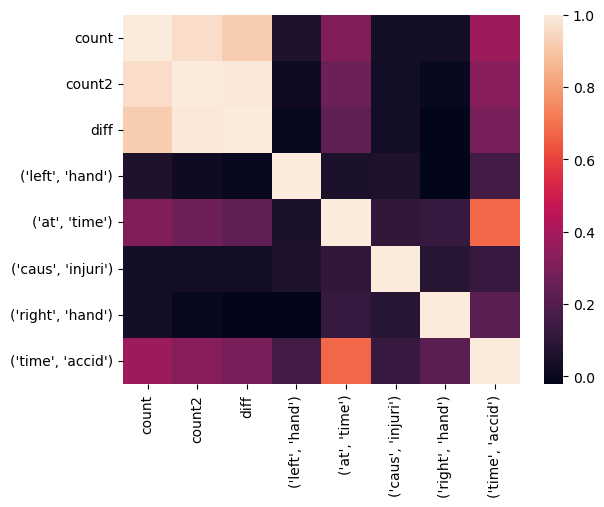

In [42]:

sns.heatmap(cat1.corr())
plt.show()

In [43]:
temp=cat1.iloc[:,7:12]
temp

,"(at, time)","(caus, injuri)","(right, hand)","(time, accid)",Accident Level
0,0,0,0,0,I
1,0,0,0,0,I
2,0,1,0,0,I
3,0,1,0,0,I
5,0,0,0,0,I
...,...,...,...,...,...
420,0,0,0,0,I
421,0,1,0,0,I
422,0,0,0,0,I
423,0,0,0,0,I


In [44]:
temp.sum() # The number of occurrences in this category 

(at, time)                                                       46
(caus, injuri)                                                   39
(right, hand)                                                    40
(time, accid)                                                    42
Accident Level    IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
dtype: object

### For Level 2 Reporting

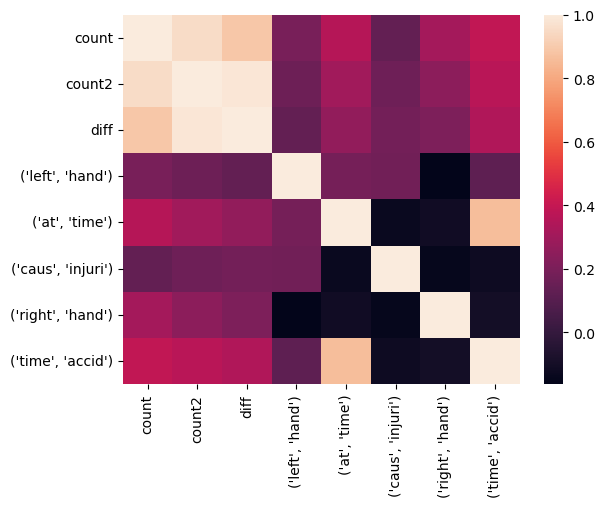

In [45]:
cat2=cat.get_group("II")
sns.heatmap(cat2.corr())
plt.show()

In [46]:
temp=cat2.iloc[:,7:12]
temp.sum()

(at, time)                                                        5
(caus, injuri)                                                    6
(right, hand)                                                     7
(time, accid)                                                     3
Accident Level    IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
dtype: object

### For Level 3 Reporting

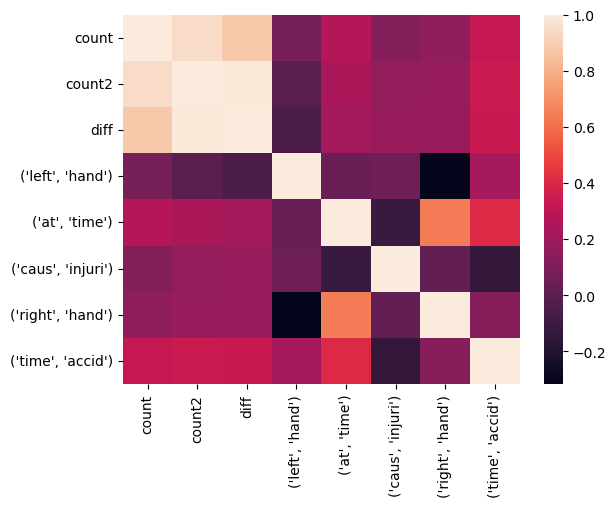

In [47]:
cat3=cat.get_group("III")
sns.heatmap(cat3.corr())
plt.show()

In [48]:
temp=cat3.iloc[:,7:12]
temp.sum()

(at, time)                                                        4
(caus, injuri)                                                    4
(right, hand)                                                     7
(time, accid)                                                     5
Accident Level    IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
dtype: object

### For Level 4 Reporting

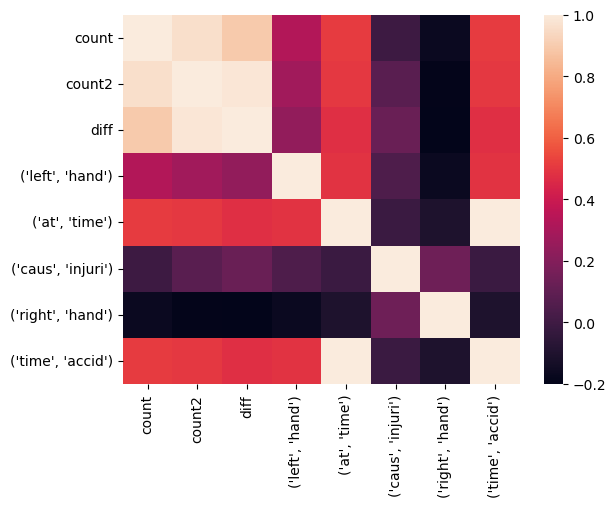

In [49]:
cat4=cat.get_group("IV")
sns.heatmap(cat4.corr())
plt.show()

In [50]:
temp=cat4.iloc[:,7:12]
temp.sum()

(at, time)                                                        4
(caus, injuri)                                                    8
(right, hand)                                                     2
(time, accid)                                                     4
Accident Level    IVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIV...
dtype: object

### For Level 5 Reporting


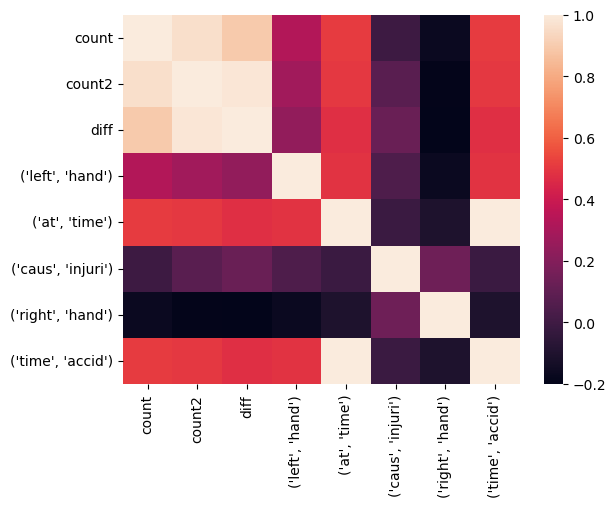

In [51]:
cat5=cat.get_group("IV")
sns.heatmap(cat5.corr())
plt.show()

In [52]:
temp=cat5.iloc[:,7:12]
temp.sum()

(at, time)                                                        4
(caus, injuri)                                                    8
(right, hand)                                                     2
(time, accid)                                                     4
Accident Level    IVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIV...
dtype: object

**Important Observation**


Whenver the word "left hand" is used, it is highly likely that it is going to escalate into higher and higher levels of potential. That means, if those words every come into description, we have to be extra careful with it. 

Also if the time of the accident is perfectly given by time, accident bigrams that means the accident is very well noted down and less chance of esacalating.

## Analysis of Trigrams

In [53]:
df_trigram=df.join([df_trigram,df2[["Accident Level","Potential Accident Level","Industry Sector","Critical Risk"]]])

In [54]:
#sns.histplot(data=cat3,x="Industry Sector")

In [55]:
df_trigram

,Target,Text,tokens,count,count2,diff,"(at, time, accid)","(finger, left, hand)","(injuri, at, time)","(caus, injuri, the)","(finger, right, hand)",Accident Level,Potential Accident Level,Industry Sector,Critical Risk
0,I,While removing the drill rod of the Jumbo 08 f...,"[while, remov, drill, rod, jumbo, mainten, sup...",33,84,51,0,0,0,0,0,I,IV,Mining,Pressed
1,I,During the activation of a sodium sulphide pum...,"[dure, activ, sodium, sulphid, pump, pipe, unc...",26,59,33,0,0,0,0,0,I,IV,Mining,Pressurized Systems
2,I,In the sub-station MILPO located at level +170...,"[in, level, collabor, excav, work, pick, hand,...",23,62,39,0,0,0,0,0,I,III,Mining,Manual Tools
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,"[be, approxim, personnel, task, unlock, machin...",36,110,74,0,0,0,0,0,I,I,Mining,Others
4,IV,Approximately at 11:45 a.m. in circumstances t...,"[approxim, mechan, group, leader, eric, three,...",27,100,73,0,0,0,0,0,IV,IV,Mining,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,I,"Being approximately 5:00 a.m. approximately, w...","[be, approxim, approxim, lift, kelli, toward, ...",18,41,23,0,0,0,0,0,I,III,Mining,Others
421,I,The collaborator moved from the infrastructure...,"[the, collabor, infrastructur, offic, julio, p...",19,43,24,0,0,0,0,0,I,II,Mining,Others
422,I,During the environmental monitoring activity i...,"[dure, environment, activ, area, employe, swar...",18,49,31,0,1,0,0,0,I,II,Metals,Venomous Animals
423,I,The Employee performed the activity of strippi...,"[the, employe, activ, strip, cathod, sheet, ha...",17,36,19,0,1,0,0,0,I,II,Metals,Cut


In [56]:
#Now grouping based on the how these bigrams are distributed.
cat=df_trigram.groupby("Accident Level")

### For Level 1 Reporting

In [57]:
cat1=cat.get_group("I")

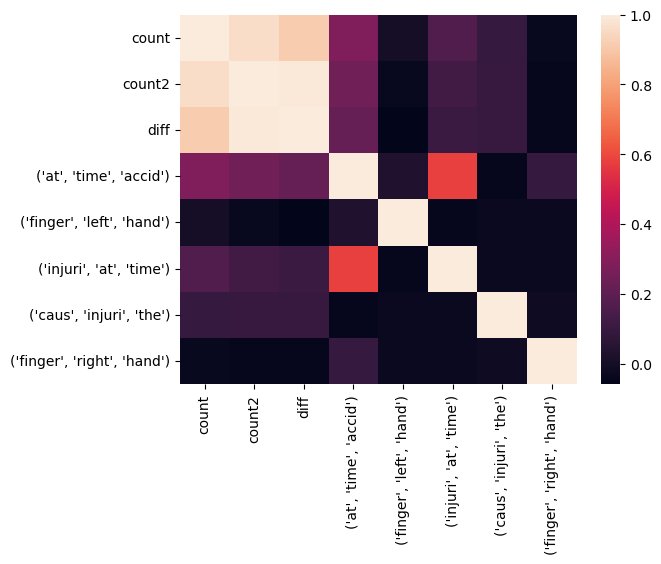

In [58]:
sns.heatmap(cat1.corr())
plt.show()

In [59]:
temp=cat1.iloc[:,7:12]
temp.sum()

(finger, left, hand)                                                    14
(injuri, at, time)                                                      14
(caus, injuri, the)                                                      6
(finger, right, hand)                                                    7
Accident Level           IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
dtype: object

### For Level 2  Reporting


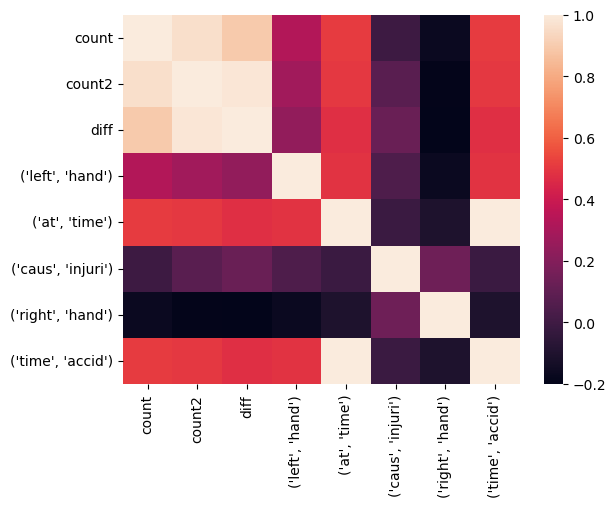

In [60]:
cat2=cat.get_group("II")
sns.heatmap(cat5.corr())
plt.show()

In [61]:
temp=cat2.iloc[:,7:12]
temp.sum()

(finger, left, hand)                                                     2
(injuri, at, time)                                                       0
(caus, injuri, the)                                                      0
(finger, right, hand)                                                    4
Accident Level           IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
dtype: object

### For Level 3 Reporting

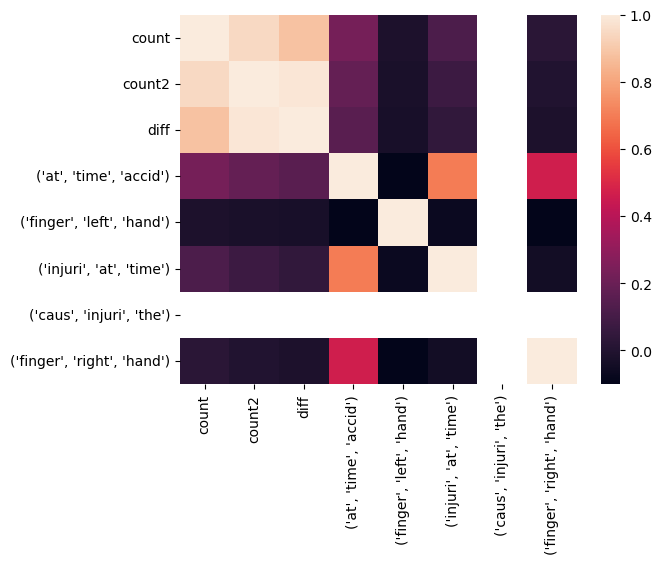

In [62]:
cat3=cat.get_group("III")
sns.heatmap(cat3.corr())
plt.show()

In [63]:
temp=cat3.iloc[:,4:9]
temp.sum()

count2                  2718
diff                    1709
(at, time, accid)          2
(finger, left, hand)       4
(injuri, at, time)         1
dtype: int64

### For Level 4 Reporting

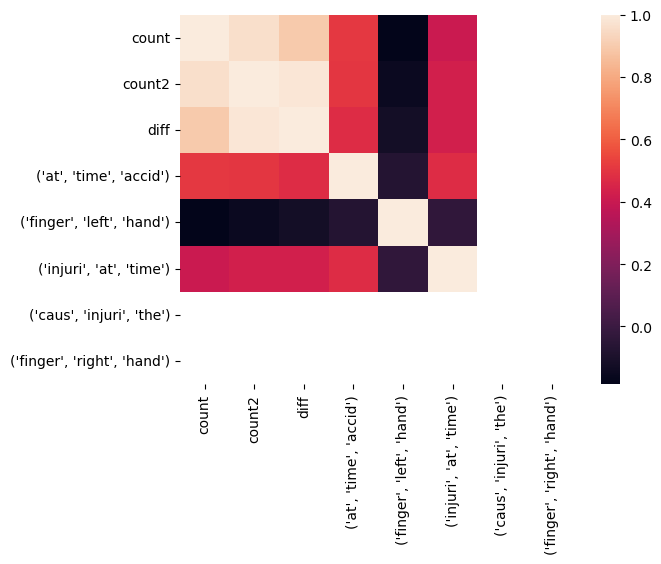

In [64]:
cat4=cat.get_group("IV")
sns.heatmap(cat4.corr())
plt.show()

In [65]:
temp=cat4.iloc[:,7:12]
temp.sum()

(finger, left, hand)                                                     1
(injuri, at, time)                                                       1
(caus, injuri, the)                                                      0
(finger, right, hand)                                                    0
Accident Level           IVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIVIV...
dtype: object

### For Level 5 Reporting

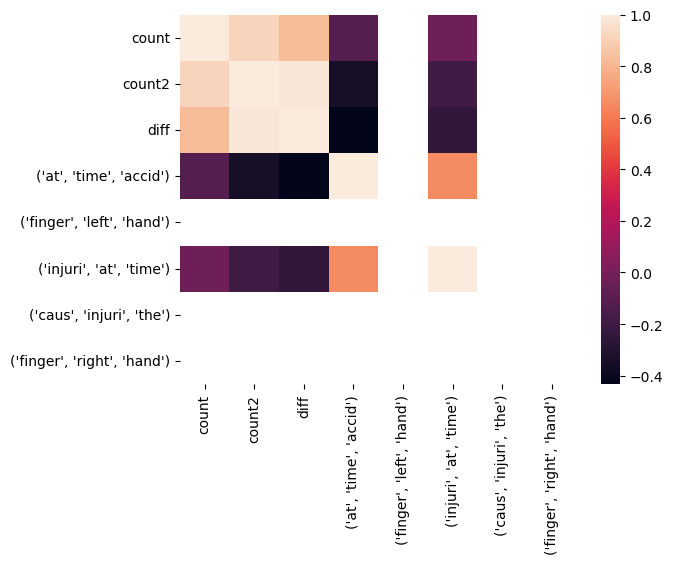

In [66]:
cat5=cat.get_group("V")
sns.heatmap(cat5.corr())
plt.show()

In [67]:
temp=cat5.iloc[:,7:12]
temp.sum()

(finger, left, hand)            0
(injuri, at, time)              1
(caus, injuri, the)             0
(finger, right, hand)           0
Accident Level           VVVVVVVV
dtype: object

**Observation**

It is observed here that there aren't many trigrams in use and hence don't indicate anything much about the possible data about prediction. Hence, trigrams aren't of much importance when dealing with data. 

## Analysis of Skipgrams

In [68]:
df_skipgram=df.join([df_skipgram,df2[["Accident Level","Potential Accident Level","Industry Sector","Critical Risk"]]])

In [69]:
df_skipgram

,Target,Text,tokens,count,count2,diff,"(left, hand)","(at, time)","(caus, injuri)","(right, hand)","(time, accid)",Accident Level,Potential Accident Level,Industry Sector,Critical Risk
0,I,While removing the drill rod of the Jumbo 08 f...,"[while, remov, drill, rod, jumbo, mainten, sup...",33,84,51,0,0,0,0,0,I,IV,Mining,Pressed
1,I,During the activation of a sodium sulphide pum...,"[dure, activ, sodium, sulphid, pump, pipe, unc...",26,59,33,0,0,0,0,0,I,IV,Mining,Pressurized Systems
2,I,In the sub-station MILPO located at level +170...,"[in, level, collabor, excav, work, pick, hand,...",23,62,39,0,0,1,0,0,I,III,Mining,Manual Tools
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,"[be, approxim, personnel, task, unlock, machin...",36,110,74,1,0,1,0,0,I,I,Mining,Others
4,IV,Approximately at 11:45 a.m. in circumstances t...,"[approxim, mechan, group, leader, eric, three,...",27,100,73,0,0,1,0,0,IV,IV,Mining,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,I,"Being approximately 5:00 a.m. approximately, w...","[be, approxim, approxim, lift, kelli, toward, ...",18,41,23,0,0,0,0,0,I,III,Mining,Others
421,I,The collaborator moved from the infrastructure...,"[the, collabor, infrastructur, offic, julio, p...",19,43,24,0,0,1,0,0,I,II,Mining,Others
422,I,During the environmental monitoring activity i...,"[dure, environment, activ, area, employe, swar...",18,49,31,1,0,0,0,0,I,II,Metals,Venomous Animals
423,I,The Employee performed the activity of strippi...,"[the, employe, activ, strip, cathod, sheet, ha...",17,36,19,1,0,0,0,0,I,II,Metals,Cut


**Observation**

It is observed that skipgrams share the same pairs as that of Bigrams. There is no point in repeating them. But, it needs to be investigated why they are the same. But, if they turn out to be same, it is most probably because the description of text is never beyond an average of 36 words to describe text. So, there is not much scope towards analysis.

## Conclusion Based on ngram, Skipgram Analysis

It can be seen that though bigrams are of much importance, tri grams don't seem to be of much influence. Skipgrams also don't seem to have that good of a analytic part too. There are two conclusions to make here.

1. Enough analysis based on the separate sentence break down (sentence tokenization) needs to be done so that proper representation can be done whether the skipgrams were any effective in judging sequential relationship between data and its indicator of anyway between escalation of reported incident to higher incident.

2. Most of the bigram combinations and the wrods listed in these ngrams occupy a major chunk of the given description of any incident. Hence, it becomes important that we have to have proper analysis of unique words in the corpus and possible relation to being in any particular Industry or sector. That way, we can make sure that we can compensate the corpus data that we have as description to fill up the data, if not given by the user.

3. Given that above is not done, or if is deemed not required, we can proceed towards the suggestion that LSTM networks if used, doesn't need to process very or extremely long sequences. So, just two or 3 LSTM units are enough for the processing.

4. If it is decided that to replace words with their bigram counter parts, then it is advised that one should implement a method to repeat the same in the input data at runtime, so appropriate care is taken.

5. 

# Analysis of Word Frequencies with respect to each of the Columns

## Analyzing by Industry

In [70]:
df3=df.join(df2[["Accident Level","Potential Accident Level","Industry Sector","Critical Risk"]]).groupby("Industry Sector")

In [71]:
df2["Industry Sector"].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

### Metals Industry

In [72]:
cat=df3.get_group("Metals")
cat

,Target,Text,tokens,count,count2,diff,Accident Level,Potential Accident Level,Industry Sector,Critical Risk
5,I,During the unloading operation of the ustulado...,"[dure, oper, bag, need, unclog, discharg, mout...",20,55,35,I,III,Metals,Pressurized Systems
6,I,The collaborator reports that he was on street...,"[the, collabor, street, hold, left, hand, volu...",19,44,25,I,III,Metals,Fall prevention (same level)
9,I,At the moment the forklift operator went to ma...,"[at, moment, oper, went, manipul, big, bag, bi...",32,72,40,I,II,Metals,Chemical substances
12,I,The collaborator reports that he was working i...,"[the, collabor, work, cyclon, duct, door, tri,...",17,45,28,I,I,Metals,Liquid Metal
14,I,Due to the accumulation of Waelz on the convey...,"[due, accumul, trailer, filter, employe, clean...",20,65,45,I,III,Metals,Confined space
...,...,...,...,...,...,...,...,...,...,...
402,I,Mr. Emerson was moving trays; when climbing th...,"[move, climb, staircas, access, former, dine, ...",26,75,49,I,III,Metals,Fall
405,I,"Approx. 18:40 hours, Mr. Luis maintenance team...","[mainten, team, mobil, equip, bolt, front, loa...",22,60,38,I,II,Metals,Cut
415,I,Employee reports that by removing the zinc she...,"[employe, remov, zinc, sheet, cathod, take, ea...",13,31,18,I,II,Metals,Others
422,I,During the environmental monitoring activity i...,"[dure, environment, activ, area, employe, swar...",18,49,31,I,II,Metals,Venomous Animals


In [73]:
cat["diff"].describe()

count    134.000000
mean      28.276119
std       12.770026
min        9.000000
25%       18.000000
50%       26.000000
75%       36.000000
max       66.000000
Name: diff, dtype: float64

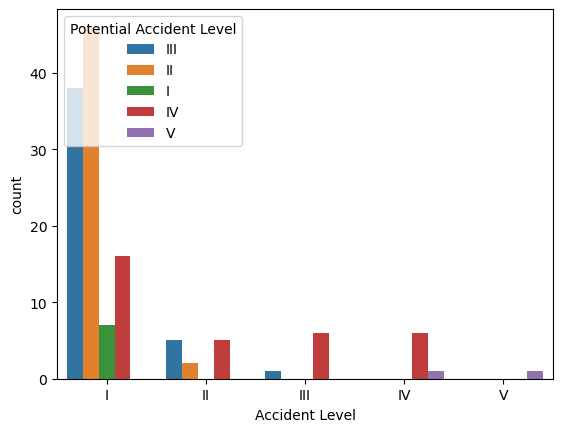

In [74]:
sns.countplot(data=cat,x=cat["Accident Level"],hue="Potential Accident Level")
plt.show()

**Observations**

It is observed here that in Mining Industry Level 1 incident is quickly escalating to level 2, then to level 3 and so on. But, if the reported incident itself is starting at level 2, then there is little chance of sustaining it at level 2, it will equally likely to escalate into level 4 (even skipping level 3). 

Simiarly once observed at level 3 it is highly likely that it is not at all sustained at level 3. It will most likely go into level 4. 

But when it is observed to be at level 4 it will likely sustained at level 4 and will not move into level5. 


Based on the above data we are now going to get some word frequency predicitons and how they are distributed across the potential incident levels.

In [75]:
word_corpus.sort_values(ascending=False) # This is for the entire Corpus of the data

the         182
caus        168
hand        167
employe     162
left        160
           ... 
none          1
damag         1
civil         1
pendulum      1
laundri       1
Length: 1685, dtype: int64

In [76]:
corp_metal=pd.Series(FreqDist(flatten(list(cat["tokens"])))).sort_values(ascending=False)
corp_metal[:10]
#This is the Corpus of the Metal Industry for most used 10 words

employe    77
the        61
left       47
hand       46
caus       43
right      37
oper       37
activ      26
at         25
medic      24
dtype: int64

**Observations**

There seems to be a lot more left hand related accidents in metal industry than there are any other field.

Most of the words that are in original corpus i.e. 50% of them, are in the corpus for Metal.



### Mining Industry

In [77]:
cat=df3.get_group("Mining")
cat

,Target,Text,tokens,count,count2,diff,Accident Level,Potential Accident Level,Industry Sector,Critical Risk
0,I,While removing the drill rod of the Jumbo 08 f...,"[while, remov, drill, rod, jumbo, mainten, sup...",33,84,51,I,IV,Mining,Pressed
1,I,During the activation of a sodium sulphide pum...,"[dure, activ, sodium, sulphid, pump, pipe, unc...",26,59,33,I,IV,Mining,Pressurized Systems
2,I,In the sub-station MILPO located at level +170...,"[in, level, collabor, excav, work, pick, hand,...",23,62,39,I,III,Mining,Manual Tools
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,"[be, approxim, personnel, task, unlock, machin...",36,110,74,I,I,Mining,Others
4,IV,Approximately at 11:45 a.m. in circumstances t...,"[approxim, mechan, group, leader, eric, three,...",27,100,73,IV,IV,Mining,Others
...,...,...,...,...,...,...,...,...,...,...
414,I,"On the surface, Comedor the worker of the comp...","[on, surfac, worker, compani, c, c, made, cut,...",20,42,22,I,II,Mining,Cut
419,I,After maintenance on Boltec 03 at level 285 GT...,"[after, mainten, level, mechan, oper, equip, e...",17,48,31,I,III,Mining,Pressed
420,I,"Being approximately 5:00 a.m. approximately, w...","[be, approxim, approxim, lift, kelli, toward, ...",18,41,23,I,III,Mining,Others
421,I,The collaborator moved from the infrastructure...,"[the, collabor, infrastructur, offic, julio, p...",19,43,24,I,II,Mining,Others


In [78]:
cat["diff"].describe()

count    241.000000
mean      50.630705
std       22.718030
min       13.000000
25%       38.000000
50%       47.000000
75%       62.000000
max      137.000000
Name: diff, dtype: float64

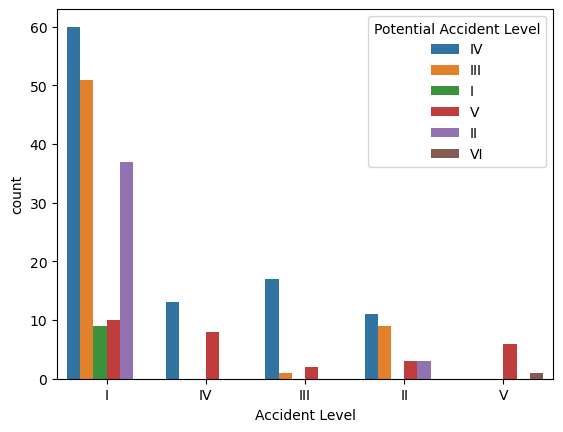

In [79]:
sns.countplot(data=cat,x=cat["Accident Level"],hue="Potential Accident Level")
plt.show()

**Observations**

It seems that those that are reported at level 1 are more than likely to end up at level 4 potential. Very little portion of the level 1 incidents seem to be retained at that very same level.

Extremely low number actually have the highest potential from level 4 disaster. 

There is always quick escalation from level 3 to level 4 and sustenance in level 3 is very little for Mining Industry.

In [80]:
corp_mining=pd.Series(FreqDist(flatten(list(cat["tokens"])))).sort_values(ascending=False)
corp_mining[:10]
# This is the Corpus of the Mining Industry for most used 10 words

caus      106
right     104
oper      104
hand      103
at        101
time       99
left       94
injuri     91
the        76
equip      68
dtype: int64

In [81]:
corp_mining.shape

(1263,)

**Observations**

*The MOST IMPORTANT OBSERVATION* here is that right hand seems to be involved a lot more in the incidents related to mining than for metals. This is a very important indicator for further analysis (especially to compensate for missing data).

Most of the incidents seem to be that operation related incidents i.e. while working and not some other time. So, that is one thing we need to work out.

Large number of words i.e. more than 1200 words are used in this corpus. That means the description for Mining is more varied than that of metals. Hence, we can think that if the description given is more scattered, especially the word vectors can't be clustered, then we can simply think that they are a particular kind.


# Others Industry

In [82]:
cat=df3.get_group("Others")
cat

,Target,Text,tokens,count,count2,diff,Accident Level,Potential Accident Level,Industry Sector,Critical Risk
78,II,"When accessing the Santa do Novo area, in orde...","[when, area, order, open, chop, gener, move, a...",40,87,47,II,II,Others,Others
79,IV,"When performing the sleeve removal maneuver, w...","[when, sleev, remov, maneuv, hole, deep, gener...",76,202,126,IV,IV,Others,Poll
80,I,"During the trip to the vehicle, at the end of ...","[dure, trip, vehicl, end, work, collabor, step...",36,81,45,I,I,Others,Others
108,I,"When performing geological mapping activity, i...","[when, geolog, activ, necessari, hammer, rock,...",18,42,24,I,I,Others,Manual Tools
119,I,When an employee of MILPO Lima visited the fac...,"[when, employe, level, wait, personnel, cage, ...",34,103,69,I,II,Others,Others
125,IV,"During field trip, to return to work after lun...","[dure, field, trip, return, work, lunch, emplo...",34,80,46,IV,IV,Others,Fall
129,I,The ground team coordinated by Prospector with...,"[the, ground, team, prospector, da, silva, pro...",47,127,80,I,I,Others,Bees
130,I,"In the geological reconnaissance activity, in ...","[in, geolog, reconnaiss, activ, farm, team, co...",53,141,88,I,I,Others,Bees
131,I,"In the geological reconnaissance activity, in ...","[in, geolog, reconnaiss, activ, farm, team, co...",53,141,88,I,I,Others,Others
136,II,"During the field trip, on LT 01 of the Lajes t...","[dure, field, trip, target, junior, da, costa,...",36,97,61,II,II,Others,Others


In [83]:
cat["diff"].describe()

count     50.000000
mean      62.080000
std       28.002799
min       14.000000
25%       41.250000
50%       62.000000
75%       85.000000
max      127.000000
Name: diff, dtype: float64

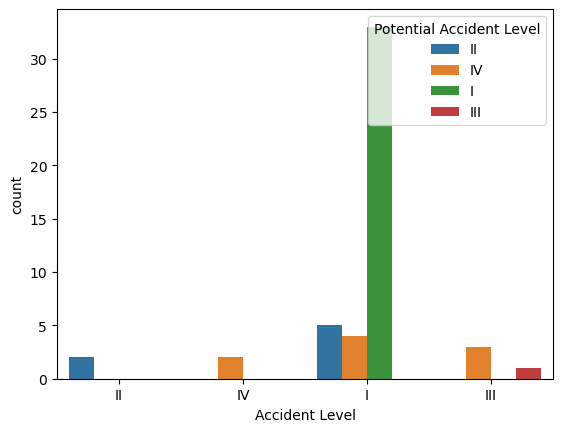

In [84]:
sns.countplot(data=cat,x=cat["Accident Level"],hue="Potential Accident Level")
plt.show()

**Observations**

For any reported incident of level 1 stayed in level 1 for other industries. That also means thatit doesn't escalate any further than that. It doesn't escalate to anything more than level 4.

Those that are identified as level 2 stayed level 2 and those identified level 3 stayed level 3 (fore the most part) and those that are identified as level 4 has stayed level 4 and hasn't escalated any further in potential threat level.



In [85]:
corp_others=pd.Series(FreqDist(flatten(list(cat["tokens"])))).sort_values(ascending=False)
corp_others

the          45
employe      42
activ        30
one          26
left         19
             ..
blackjack     1
afternoon     1
sought        1
steep         1
properli      1
Length: 531, dtype: int64

**Observations**

Most of the time is the active employees that either observe or are somehow involved in the incidents.

Since there are less than half number of words that are used in this category compared to the rest, we can be pretty sure that much lesser number of important or useful words are there in this.

We can be pretty sure that if a certain number of words of certainly be absent, we can be sure that it is "others" category because presence of those words will more likely produce the "Mining" or "Metal" industry issues.


In [86]:
word_corpus.index

Index(['while', 'remov', 'drill', 'rod', 'jumbo', 'mainten', 'supervisor',
       'proce', 'loosen', 'support',
       ...
       'research', 'she', 'properli', 'magazin', 'infrastructur', 'julio',
       'bra', 'environment', 'camp', 'laundri'],
      dtype='object', length=1685)

## Cross Analysis for Industries


In [87]:
print("Total Number of words that in total Corpus")
len(set(word_corpus.index))

Total Number of words that in total Corpus


1685

In [88]:
print("Total Number of words that are in total corpus but not in \"others\" dataset")
print(len(set(word_corpus.index)-set(corp_others.index)))

Total Number of words that are in total corpus but not in "others" dataset
1154


In [89]:
print("Total Number of words that are in total corpus but not in \"Mining\" dataset")
print(len(set(word_corpus.index)-set(corp_mining.index)))

Total Number of words that are in total corpus but not in "Mining" dataset
422


In [90]:
print("Total Number of words that are in total corpus but not in \"Metals\" dataset")
print(len(set(word_corpus.index)-set(corp_metal.index)))

Total Number of words that are in total corpus but not in "Metals" dataset
926


In [91]:
print("These are the Exclusive words in Metal Industry descriptions but not in anything else and their frequencies")

try:
    k=corp_metal[set(corp_metal.index)-set(corp_mining.index)-set(corp_others.index)].sort_values(ascending=False)
    print(k)
except:
    print("Corpus is exclusively clean")
#len(set(corp_metal.index)-set(corp_mining.index)-set(corp_others.index))

These are the Exclusive words in Metal Industry descriptions but not in anything else and their frequencies
cathod        14
thermal        6
degre          6
ingot          6
boiler         6
              ..
defin          1
solubil        1
dioxid         1
disassembl     1
deliveri       1
Length: 227, dtype: int64


**Observation**

This gives us a very valuable information regarding words. If any particular of these words are mentioned then it is more than likely that that particular reported incident might be from the Metal industry.

We can assign probability to each and every single word. So, given any industry, the description's likelihood to have certain corpus of words within their description is extremely crucial.

In [92]:
print("These are the Exclusive words in Mining Industry descriptions but not in anything else and their frequencies")
try:
    k=corp_metal[set(corp_mining.index)-set(corp_metal.index)-set(corp_others.index)].sort_values(ascending=False)
    print(k)
except:
    print("Corpus is Exclusive and clean")

#len(set(corp_metal.index)-set(corp_mining.index)-set(corp_others.index))

These are the Exclusive words in Mining Industry descriptions but not in anything else and their frequencies
Corpus is Exclusive and clean


In [93]:
print("These are the Exclusive words in Other Industry descriptions but not in anything else and their frequencies")
try:
    k=corp_metal[set(corp_others.index)-set(corp_metal.index)-set(corp_mining.index)].sort_values(ascending=False)
    print(k)
except:
    print("Corpus is Exclusive and clean")


These are the Exclusive words in Other Industry descriptions but not in anything else and their frequencies
Corpus is Exclusive and clean


**Observations**

It is extremely important and the key observations are listed here:

1. Mining industry doesn't have exclusive words. That means it is the least likelihood of choice if any case of descrepancies.

2. Other industry also doesn't have exclusive words. That means it is the least likelihood of choice if any case of discrepancies are noted.

3. Metal industry is extremely important observation. It has some exclusive words that describe what industry it is from. So, it is important to identify any patterns of observation.

4. Metal industry seems to have more detailed chained sequence of events in any given particular incident. But, that is less likely the case with 

**Hypothesis**
1. We can differentiate a certain type of industry based on the description and presence of certain words, to a certain probability within the bounds as to given.

# Final Remarks

1. Text corpus can give us the industry of the particular incident, even if it is not mentioned by the user. So, it can be used to fill missing data.
2. For other kind of guesses based on description, we have to follow secondary inferences or implications (More on this later). It needs to be studied in more detail. On the preliminary studies, it is not clear if locality or country can be guessed based on the description alone, though it might be possible to implement it.
3. Text used for LSTM needn't have more than three or four units because none of the sequences larger than that are worth it. Further experimentation needed.
4. Backward propagation seems to be not that important because sequence of occurrence of events seems less important than entire description of the events. That's because sequential or chained descriptions (in-depth descriptions) tend to use less and less of unique words (because they will be referred to by pronouns etc.)
5. None of the Industrial descriptions show significant deviations from the mean word count difference, implying that events happening in sequence is just about average. So, a normal Network with a normal propagation would suffice.

# Further Plans/Proposals after Review

1. Build a Class of the Core model with special methods in it that provides guess for the missing data based on the given description
2. Design a Neural Network that Flexibly stretches so that it can accomodate both guessing the disaster level as well as guessing with probabilty other columns.
3. Be part of a bigger class i.e. Main model, which calls its methods as part of its training and handling missing information.
4. Condition the prediction method of core model calss so that everything runs fine and when called upon by its parent calss i.e. Main model class.

# Add your Remarks in the below Cell